# Web Scrapping
Con las herramientas vistas durante el curso se pueden realizar multiples tareas como: graficar datos, modelar problemas, utlizar python como herramienta para problemas númericos, etc. Sin embargo estos problemas necesitan de algo en común: **datos**.

Un problema común es no saber de donde obtener estos datos, muchos de estos datos pueden no estar relacionados al problema de nuestro interés o pueden simplemente no estar a nuestro alcance.

Debido a esto, una solución bastante factible es *scrapear* datos. Lo cual consiste en extraer datos de sitios web que contienen información de nuestro interés.

## Herramientas a usar: Beautiful Soup

Utilizaremos la plataforma www.bookdepository.com como ejemplo de scrapping

In [ ]:
# importamos las librerias necesarias
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
url = "https://www.bookdepository.com/bestsellers"
response = requests.get(url)

Un **request** es una solicitud que hacemos al servidor donde esta alojado la web a través de el protocolo HTTP.

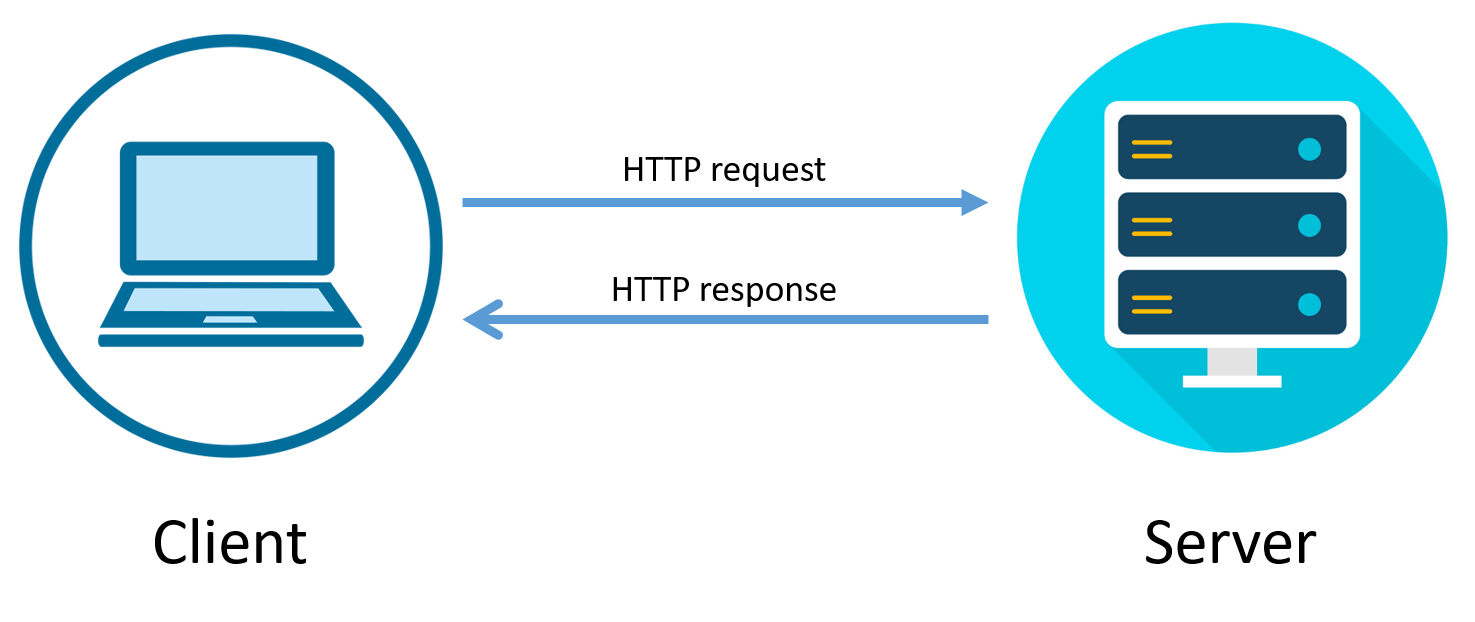

El servidor regresa una respuesta al cliente el cual almacenaremos en la variable **response**. Para ver su contenido lo imprimiremos.

In [ ]:
print(response)

<Response [200]>


Lo que obtenemos es el contenido estructurado en un objeto junto a un codigo de respuesta. Existen multiples códigos de respuesta#



1.   Respuestas informativas (100–199)
2.   Respuestas satisfactorias (200–299)
3.   Redirecciones (300–399)
4.   Errores de los clientes (400–499)
5.   Errores de los servidores (500–599)


Algunos de los códigos más comunes son los siguientes:



*   **200 OK**
*   **201 CREADO**
*   **204 SIN CONTENIDO**
*   **302 ENCONTRADO**
*   **400 SOLICITUD ERRONEA**
*   **401 SIN AUTORIZACIÓN**
*   **404 NO ENCONTRADO**
*   **500 ERROR INTERNO DE SERVIDOR**


En especifico lo obtenido en nuestra variable **response** corresponde al error 200, por lo que no habria mayor inconveniente.

Dentro del objeto **response** encontraremos el campo de nuestro interes que es el documento html. 

In [ ]:
html = response.content

Lo unico que hemos hecho ha sido almacenar el documento html dentro de la variable **html**. Imprimiremos esta para ver el contenido.

In [ ]:
print(html)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <link rel="preconnect" href="https://d3ogvdx946i4sr.cloudfront.net"/>\n<link rel="dns-prefetch" href="https://d3ogvdx946i4sr.cloudfront.net"/>\n<script type="text/javascript">\n        function csmWidgetStart(widgetName) {\n            if (typeof uet == \'function\') {\n                uet(\'bb\', widgetName, {wb: 1});\n            }\n        }\n        function csmWidgetEnd(widgetName) {\n            if (typeof uet == \'function\') {\n                uex(\'ld\', widgetName, {wb: 1});\n            }\n        }\n    </script>\n    <noscript>\n        <style>\n            .hide-when-no-js {\n                display: none !important;\n            }\n\n            .show-when-no-js {\n                display: block !important;\n            }\n        </style>\n    </noscript>\n\n    <script type="text/javascript">\n    csmWidgetStart("optimizelySnippetLoadTime");\n</script>\n<script src="https://cdn.optimizely.com/js/8322250184.js"></script

  Es esta variable **html** de la cual podremos extraer los datos. A partir de ahora usaremos la libreria beautiful soup.

In [ ]:
soup = bs(html, "lxml")
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<link href="https://d3ogvdx946i4sr.cloudfront.net" rel="preconnect"/>
<link href="https://d3ogvdx946i4sr.cloudfront.net" rel="dns-prefetch"/>
<script type="text/javascript">
        function csmWidgetStart(widgetName) {
            if (typeof uet == 'function') {
                uet('bb', widgetName, {wb: 1});
            }
        }
        function csmWidgetEnd(widgetName) {
            if (typeof uet == 'function') {
                uex('ld', widgetName, {wb: 1});
            }
        }
    </script>
<noscript>
<style>
            .hide-when-no-js {
                display: none !important;
            }

            .show-when-no-js {
                display: block !important;
            }
        </style>
</noscript>
<script type="text/javascript">
    csmWidgetStart("optimizelySnippetLoadTime");
</script>
<script src="https://cdn.optimizely.com/js/8322250184.js"></script>
<script type="text/javascript">
    csmWidgetEnd("optimizelySnippet

Podemos notar que es mucho más legible para la lectura. Exploremos que contiene el objeto soup

In [ ]:
soup.title

<title>
	Bestselling books online with free delivery at Book Depository</title>

In [ ]:
soup.h1

<h1>Bestsellers – our most popular items, updated daily.</h1>

In [ ]:
soup.h1.get_text()

'Bestsellers – our most popular items, updated daily.'

Una función que nos sera bastante util será la funcion **find()**, esto es equivalente a usar el acceso por atributo.

In [ ]:
print(soup.h1)

<h1>Bestsellers – our most popular items, updated daily.</h1>


In [ ]:
print(soup.find("h1"))

<h1>Bestsellers – our most popular items, updated daily.</h1>


Tambien podemos encontrar todos los que contienen dicha etiqueta con la función **find_all()**, este nos retornara una lista con todos los elementos que contienen dicha etiqueta.

In [ ]:
print(soup.find_all("h1"))

[<h1>Bestsellers – our most popular items, updated daily.</h1>]


In [ ]:
print(soup.find_all("a"))

Como vemos, retorna muchos resultados. Vamos a imprimir solo los 3 primeros para una mejor visualización

In [ ]:
lista_a = soup.find_all("a")
for elm in lista_a[:5]:
  print(elm)

<a class="close-button" href="#"><i class="icon-close"></i></a>
<a href="/help/topic/HelpId/53/How-we-use-cookies#helpContent" target='"_blank"'>use of cookies</a>
<a class="home-icon-link" href="/"><i class="icon-home"></i><span class="show-non-desktop">Home</span></a>
<a href="/contactus"><i class="icon-em"></i>Contact us</a>
<a href="/help" rel="nofollow"><i class="icon-info"></i>Help</a>


## Extrayendo data
Antes de la extracción tenemos que analizar un poco la estructura del HTML. Una vez analizada esta estructura veremos que por ejemplo los titulos de los libros estan en las etiquetas *h3* y que además tienen la clase *title*

In [ ]:
lista_h3 = soup.find_all("h3", class_="title")
for h3 in lista_h3:
       print(h3.get_text(strip=True))

It Ends With Us: The most heartbreaking novel you'll ever read
The Midnight Library
Seven Husbands of Evelyn Hugo
Ugly Love
Dune
Demon Slayer Complete Box Set
Heaven Official's Blessing
The Thursday Murder Club
Grandmaster of Demonic Cultivation
Where the Crawdads Sing
The Song of Achilles
No Longer Human
Atomic Habits
The Hating Game
The Love Hypothesis
The Body Keeps the Score
The Christmas Pig
Normal People
A Clockwork Orange
The Storyteller
The Scum Villain's Self-Saving System
The Beekeeper of Aleppo
Animal Farm
The Secret History
1984
Giraffes Can't Dance
Diary of a Wimpy Kid: Big Shot (Book 16)
Man's Search For Meaning
Before the Coffee Gets Cold
Brain Games For Clever Kids (R)


## Utilizando pandas:

Además usaremos pandas para poderutilizar las funciones de pandas que nos serán de utilidad.

Ahora extraeremos los formatos de los libros(paperback o hardback). Notaremos que esta información esta dentro un **p** de la clase **format** y dentro de un **div** con la clase **item-info**

In [ ]:
import pandas as pd
formats = soup.select("div.item-info p.format")
formats_series = pd.Series(formats)
formats_series.value_counts()

[Paperback]    27
[Hardback]      3
dtype: int64

Para obtener las fechas de los libros, notaremos que estas se encuentran en un elemento **p** dentro de la clase **published**.

In [ ]:
dates = soup.find_all("p", class_="published")
dates = [date.get_text()[-4:] for date in dates]
dates_series = pd.Series(dates)
dates_series.value_counts()

2021    11
2019     3
2015     3
2008     2
2014     2
2017     2
2016     2
2020     2
2011     1
2018     1
1995     1
dtype: int64